In [1]:
# imports
import numpy as np
from urllib.request import Request, urlopen
from skimage import io
from skimage.color import *
import shutil
import os
import sys
from matplotlib import pyplot as plt
import json
import pandas as pd

In [2]:
# allow use of functions from project
sys.path.insert(0, 'C:\\Users\\Nicho\\Desktop\\MineSkins')
import etl as ETL

ModuleNotFoundError: No module named 'selenium'

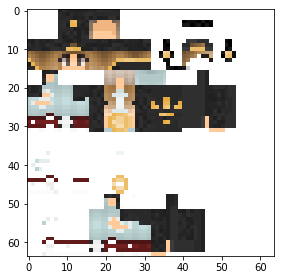

In [3]:
# read in sample skin
fname = '28.png'
skin = io.imread('../data/'+fname)
io.imshow(skin)

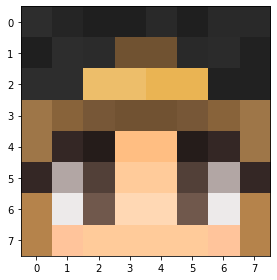

In [4]:
# grab face and torso
face = skin[8:16, 8:16, :]
torso = skin[20:32, 20:28, :]
display(io.imshow(face))

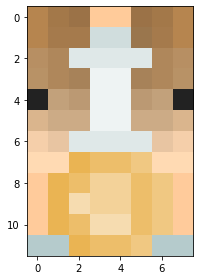

In [5]:
display(io.imshow(torso))

Text(0.5, 1.0, 'Value')

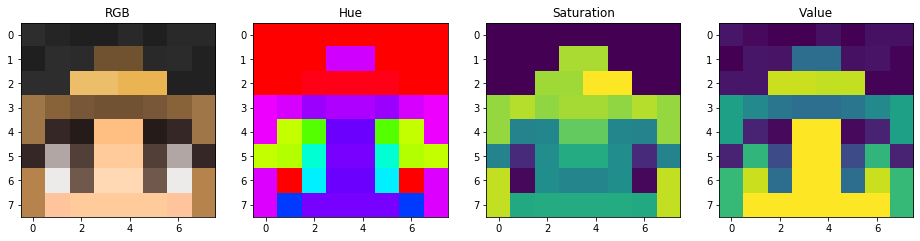

In [6]:
# analyze channels of the skin
hsv = rgb2hsv(face[:, :, :-1])
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 8))
ax[0].imshow(face)
ax[0].set_title('RGB')
ax[1].imshow(hsv[:, :, 0], cmap='hsv')
ax[1].set_title('Hue')
ax[2].imshow(hsv[:, :, 1])
ax[2].set_title('Saturation')
ax[3].imshow(hsv[:, :, 2])
ax[3].set_title('Value')

In [8]:
# compute variance of face


8172.406677246094

In [134]:
face = skin[head[0][0]:head[0][1], head[1][0]:head[1][1], :]

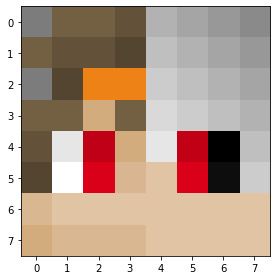

In [132]:
hsv = rgb2hsv(face)
io.imshow(face)

In [135]:
face

array([[[124, 124, 124, 255],
        [115,  95,  66, 255],
        [115,  95,  66, 255],
        [ 99,  82,  57, 255],
        [178, 178, 178, 255],
        [165, 165, 165, 255],
        [152, 152, 152, 255],
        [138, 138, 138, 255]],

       [[115,  95,  66, 255],
        [ 99,  82,  57, 255],
        [ 99,  82,  57, 255],
        [ 83,  69,  48, 255],
        [191, 191, 191, 255],
        [178, 178, 178, 255],
        [165, 165, 165, 255],
        [152, 152, 152, 255]],

       [[124, 124, 124, 255],
        [ 83,  69,  48, 255],
        [239, 130,  23, 255],
        [239, 130,  23, 255],
        [204, 204, 204, 255],
        [191, 191, 191, 255],
        [178, 178, 178, 255],
        [165, 165, 165, 255]],

       [[115,  95,  66, 255],
        [115,  95,  66, 255],
        [210, 172, 125, 255],
        [115,  95,  66, 255],
        [217, 217, 217, 255],
        [204, 204, 204, 255],
        [191, 191, 191, 255],
        [178, 178, 178, 255]],

       [[ 99,  82,  57, 255],
  

In [106]:
os.listdir('../data')

['0.png',
 '1.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '2.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '3.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '4.png',
 '40.png',
 '41.png',
 '42.png',
 '43.png',
 '44.png',
 '45.png',
 '46.png',
 '47.png',
 '48.png',
 '49.png',
 '5.png',
 '50.png',
 '51.png',
 '52.png',
 '53.png',
 '54.png',
 '55.png',
 '56.png',
 '57.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 'steve.png',
 'template.png',
 'tree.png']

### Tag Analysis

In [2]:
# create dictionary of English words (~500k words)
words_fp = os.path.join('..', 'words_dictionary.json')
with open(words_fp) as f:
    words_dict = json.load(f)
words = []
for w in words_dict.keys():
    words.append(w.lower())

In [3]:
# read tag data
fp = os.path.join('..', 'tags.txt')
with open(fp) as f:
    tags_dict = json.load(f)

# compile into list (313 pre-processing)
tags = []
for key, item in tags_dict.items():
    if len(item) > 0:
        tags += item
        
# remove duplicates and non words (127 after processing)
filtered_tags = []
i = 0
for i in range(len(tags)-1):
    if tags[i] not in tags[i+1:] and tags[i].lower() in words:
        filtered_tags.append(tags[i].lower())

In [4]:
df_tags = pd.DataFrame(filtered_tags, columns={'Tag'})
df_tags.sort_values(by='Tag').reset_index(drop=True)

,Tag
0,aesthetic
1,anime
2,announcement
3,aqua
4,art
...,...
122,wave
123,waves
124,weird
125,white


In [5]:
filtered_imgs = []
i = 0
for key, item in tags_dict.items():
    for t in filtered_tags:
        if t in item:
            filtered_imgs.append(str(int(key)-1))
            break

0

In [6]:
data = []
for i in filtered_imgs:
    data.append(io.imread('../data/'+i+'.png').flatten().reshape(1, -1))
data = np.array(data)

### Image Clustering

In [7]:
import umap
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

Using TensorFlow backend.


In [8]:
from keras import backend as K
K.set_image_data_format('channels_first')

In [9]:
model = VGG16(weights='imagenet', include_top=False)

AttributeError: module 'tensorflow._api.v2.config' has no attribute 'experimental_list_devices'

In [ ]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

In [59]:
np.array([1,2]) + np.array([2])

array([3, 4])

In [10]:
# build a few feature vectors
N = 40
data = np.array([])
for i in filtered_imgs[:N]:
    image = load_img('../data/'+i+'.png', target_size=(224,224))
    image = img_to_array(image).reshape((1, 3, 224, 224))
    image = preprocess_input(image)
    vgg16_feature_vector = np.array(model.predict(image)).flatten().reshape(1, -1)
    data = np.append(data, vgg16_feature_vector)
data = data.reshape(N, -1)

# reduce dimensions
reducer = umap.UMAP(random_state=42)
reducer.fit(data)
embedding = reducer.transform(data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

NameError: name 'model' is not defined

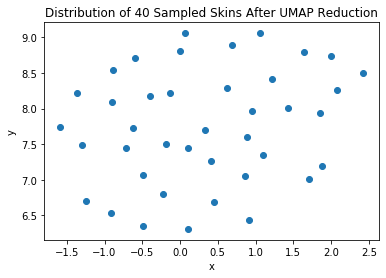

In [88]:
# plot
plt.scatter([x[0] for x in embedding], [x[1] for x in embedding])
plt.title('Distribution of 40 Sampled Skins After UMAP Reduction')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('reduced-data.png')

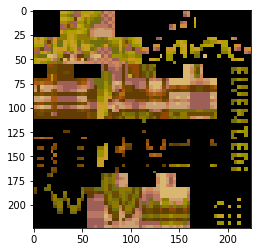

In [44]:
image = load_img('../data/1.png', target_size=(224,224))
plt.imshow(image)

In [45]:
image = img_to_array(image)
image.shape

(3, 224, 224)

In [46]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [64]:
data = preprocess_input(data)

IndexError: too many indices for array

In [48]:
vgg16_feature = model.predict(image)
vgg16_feature.shape

(1, 512, 7, 7)

In [49]:
vgg16_feature_np = np.array(vgg16_feature)
vgg16_feature_np.shape

(1, 512, 7, 7)

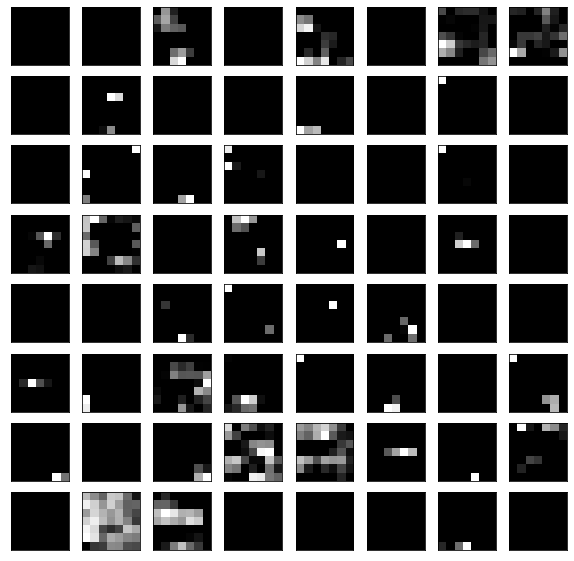

In [50]:
plt.figure(figsize=(10,10))
plt.title('First 64 Feature maps (7 x 7) For Image', fontsize=16);
# plot 64 of the maps on an 8x8 square. (NOTE we have 512 total)
xcount = 8
ycount = 8
ix = 1
for _ in range(xcount):
    for _ in range(ycount):
        # specify subplot and turn of axis
        ax = plt.subplot(xcount, ycount, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(vgg16_feature[0, ix-1, :, :], cmap='gray')
        ix += 1

In [54]:
vgg16_feature_vector = vgg16_feature_np.flatten().reshape(1, -1)
vgg16_feature_vector.shape

(1, 25088)

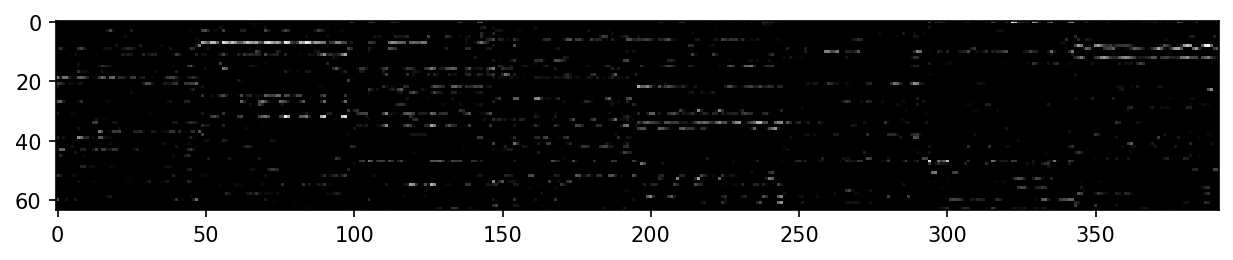

In [52]:
plt.figure(figsize=(10, 4), dpi=150)
plt.imshow(vgg16_feature_vector.reshape((64, 392)), cmap='gray')

In [71]:
reducer = umap.UMAP(random_state=42)
reducer.fit(data)

C:\Users\Nicho\anaconda3\lib\site-packages\umap\umap_.py:1674: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [73]:
embedding = reducer.transform(data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(5, 2)

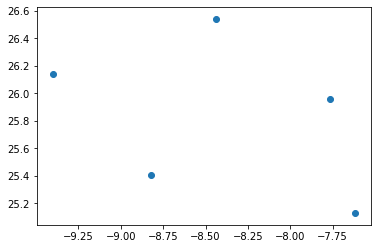

In [77]:
plt.scatter([x[0] for x in embedding], [x[1] for x in embedding])